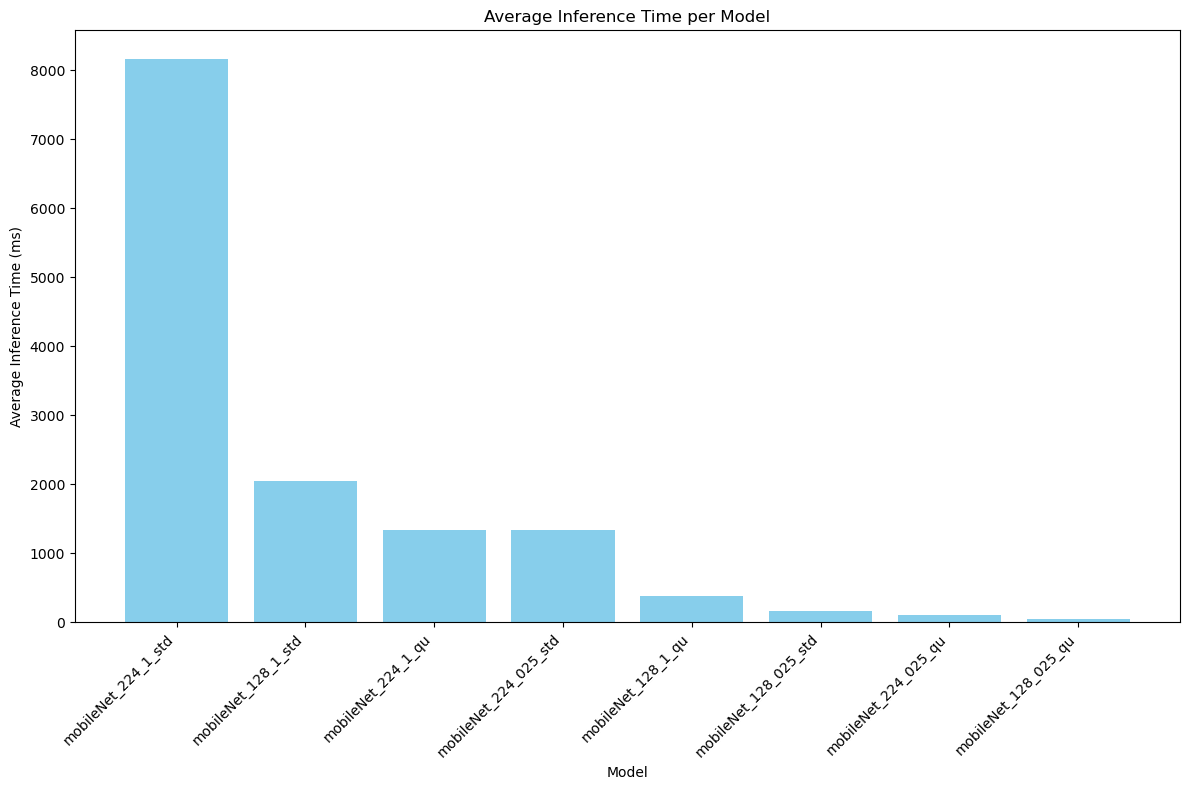

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
df128_1_qu = pd.read_csv('../data/mobileNet_128/1_0/quantized/mobilenet_v1_1.0_128_quant_MCU.csv', delimiter=',')
df128_1_std = pd.read_csv('../data/mobileNet_128/1_0/standard/mobilenet_v1_1.0_128_MCU.csv', delimiter=',')
df128_025_qu = pd.read_csv('../data/mobileNet_128/0_25/quantized/mobilenet_v1_0_25_128_quant_MCU.csv', delimiter=',')
df128_025_std = pd.read_csv('../data/mobileNet_128/0_25/standard/mobilenet_v1_0_25_128_MCU.csv', delimiter=',')
df224_1_qu = pd.read_csv('../data/mobileNet_224/1_0/quantized/mobilenet_v1_1.0_224_quant_MCU.csv', delimiter=',')
df224_1_std = pd.read_csv('../data/mobileNet_224/1_0/standard/mobilenet_v1_1.0_224_tfs_MCU.csv', delimiter=',')
df224_025_qu = pd.read_csv('../data/mobileNet_224/0_25/int8quant/mobilenet_v1_0_25_224_tfs_int8_MCU.csv', delimiter=',')
df224_025_std = pd.read_csv('../data/mobileNet_224/1_0/quantized/mobilenet_v1_1.0_224_quant_MCU.csv', delimiter=',')

# Define a function to filter the DataFrame
def filter_df(df):
    return df[(df["board"] == "STM32H7S78-DK") & (df["optimization"] == "balanced")]

# Filter DataFrames
df128_1_qu_filtered = filter_df(df128_1_qu)
df128_1_std_filtered = filter_df(df128_1_std)
df128_025_qu_filtered = filter_df(df128_025_qu)
df128_025_std_filtered = filter_df(df128_025_std)
df224_1_qu_filtered = filter_df(df224_1_qu)
df224_1_std_filtered = filter_df(df224_1_std)
df224_025_qu_filtered = filter_df(df224_025_qu)
df224_025_std_filtered = filter_df(df224_025_std)

# Extract and average inference times
inference_times = {
    "mobileNet_128_1_qu": df128_1_qu_filtered["duration_ms"].mean(),
    "mobileNet_128_1_std": df128_1_std_filtered["duration_ms"].mean(),
    "mobileNet_128_025_qu": df128_025_qu_filtered["duration_ms"].mean(),
    "mobileNet_128_025_std": df128_025_std_filtered["duration_ms"].mean(),
    "mobileNet_224_1_qu": df224_1_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_1_std": df224_1_std_filtered["duration_ms"].mean(),
    "mobileNet_224_025_qu": df224_025_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_025_std": df224_025_std_filtered["duration_ms"].mean(),
}

error = {
    "mobileNet_128_1_qu": df128_1_qu_filtered["val_error"].mean(),
    "mobileNet_128_1_std": df128_1_std_filtered["val_error"].mean(),
    "mobileNet_128_025_qu": df128_025_qu_filtered["val_error"].mean(),
    "mobileNet_128_025_std": df128_025_std_filtered["val_error"].mean(),
    "mobileNet_224_1_qu": df224_1_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_1_std": df224_1_std_filtered["duration_ms"].mean(),
    "mobileNet_224_025_qu": df224_025_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_025_std": df224_025_std_filtered["duration_ms"].mean(),
}

# Sort inference times
sorted_inference_times = dict(sorted(inference_times.items(), key=lambda item: item[1], reverse=True))

# Plot the results
plt.figure(figsize=(12, 8))
plt.bar(sorted_inference_times.keys(), sorted_inference_times.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Inference Time (ms)')
plt.title('Average Inference Time per Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
